### 1. IMPORT REQUIRED LIBRARIES 

In [1]:
# --- 1. IMPORT REQUIRED LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

# Scikit-learn modules
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report, 
                             precision_recall_curve, roc_curve)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Imbalanced learning
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as imbalanced_pipeline

# XGBoost
from xgboost import XGBClassifier

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("viridis")
%matplotlib inline

c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. LOAD AND EXPLORE DATA 

In [2]:
# --- 2. LOAD AND EXPLORE DATA ---
# Load the dataset
data = pd.read_csv('roadsafety_cleaned.csv')
print(f"Dataset shape: {data.shape}")

# Display first few rows
print("\nFirst 5 rows:")
display(data.head())

# Basic information
print("\nDataset info:")
data.info()

# Check for missing values
print("\nMissing values per column:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Statistical summary
print("\nStatistical summary:")
display(data.describe())

Dataset shape: (104174, 26)

First 5 rows:


,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_detail,junction_control,...,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,weekday,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,9,4,...,4,8,1,0.0,E09000024,False,True,1.0,6.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,3,4,...,4,1,1,0.0,E09000010,False,True,1.0,6.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,1,4,...,4,1,1,0.0,E09000017,False,True,1.0,6.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,3,4,...,4,9,1,0.0,E09000003,False,True,1.0,6.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,8,4,...,4,1,1,0.0,E09000032,False,True,1.0,6.0,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104174 entries, 0 to 104173
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   longitude                                104174 non-null  float64
 1   latitude                                 104174 non-null  float64
 2   urban_or_rural_area                      104174 non-null  int64  
 3   accident_severity                        104174 non-null  int64  
 4   day_of_week                              104174 non-null  int64  
 5   first_road_class                         104174 non-null  int64  
 6   second_road_class                        104174 non-null  int64  
 7   road_type                                104174 non-null  int64  
 8   junction_detail                          104174 non-null  int64  
 9   junction_control                         104174 non-null  int64  
 10  pedestrian_crossi

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_detail,junction_control,...,special_conditions_at_site,carriageway_hazards,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,month,weekday,is_weekend
count,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,...,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000
mean,-1.203882,52.366015,1.325523,2.746050,4.128890,4.225527,3.107464,5.293999,4.628679,3.858170,...,0.403700,0.345230,35.877186,2.025851,1.689923,3.163169,3.391336,6.593757,2.914422,0.248133
std,1.349129,1.320964,0.469145,0.467614,1.929041,1.464019,2.762572,1.701227,14.726011,1.009898,...,1.837847,1.734419,14.351949,1.695979,1.885733,2.820135,3.300668,3.412203,1.920187,0.431931
min,-7.429339,49.914528,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,-1.000000,-1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-2.091087,51.460166,1.000000,3.000000,3.000000,3.000000,0.000000,6.000000,0.000000,4.000000,...,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000
50%,-1.081291,51.816626,1.000000,3.000000,4.000000,4.000000,3.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,30.000000,1.000000,1.000000,2.000000,2.000000,7.000000,3.000000,0.000000
75%,-0.134157,53.341238,2.000000,3.000000,6.000000,6.000000,6.000000,6.000000,3.000000,4.000000,...,0.000000,0.000000,40.000000,4.000000,1.000000,5.000000,6.000000,10.000000,4.000000,0.000000
max,1.756018,60.252418,3.000000,3.000000,7.000000,6.000000,6.000000,9.000000,99.000000,9.000000,...,9.000000,9.000000,70.000000,7.000000,9.000000,9.000000,9.000000,12.000000,6.000000,1.000000


### 3. DATA PREPROCESSING 

In [3]:
# --- 3. DATA PREPROCESSING ---
# Create binary target variable (Slight vs Severe)
def create_binary_target(severity):
    """Convert 3-class to binary: Severe (Fatal+Serious) vs Slight"""
    if severity in [1, 2]:  # Serious or Fatal
        return 0  # Severe
    else:  # Slight
        return 1  # Slight

data['severity_binary'] = data['accident_severity'].apply(create_binary_target)

# Check class distribution
print("Class distribution:")
print(data['severity_binary'].value_counts())
print(f"\nClass ratio (Slight:Severe): {data['severity_binary'].value_counts()[1]/data['severity_binary'].value_counts()[0]:.2f}:1")

# Drop the original severity column
data = data.drop('accident_severity', axis=1)

# Identify feature types
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('severity_binary')  # Remove target from features

print(f"\nCategorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")

Class distribution:
severity_binary
1    79240
0    24934
Name: count, dtype: int64

Class ratio (Slight:Severe): 3.18:1

Categorical features: ['ons_district_grouped']
Numerical features: ['longitude', 'latitude', 'urban_or_rural_area', 'day_of_week', 'first_road_class', 'second_road_class', 'road_type', 'junction_detail', 'junction_control', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'speed_limit', 'light_conditions', 'weather_conditions', 'location_cluster', 'region_cluster', 'month', 'weekday', 'is_weekend']


### 4. EXPLORATORY DATA ANALYSIS

In [4]:
data.columns

Index(['longitude', 'latitude', 'urban_or_rural_area', 'day_of_week',
       'first_road_class', 'second_road_class', 'road_type', 'junction_detail',
       'junction_control', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'speed_limit',
       'light_conditions', 'weather_conditions', 'location_cluster',
       'region_cluster', 'ons_district_grouped', 'is_rush_hour', 'is_night',
       'month', 'weekday', 'is_weekend', 'severity_binary'],
      dtype='object')

In [5]:
data['severity_binary'] = data['severity_binary'].astype(int)


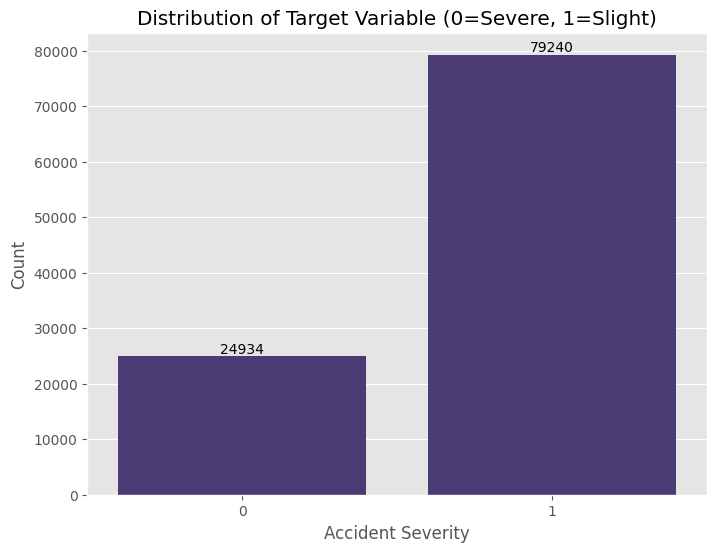

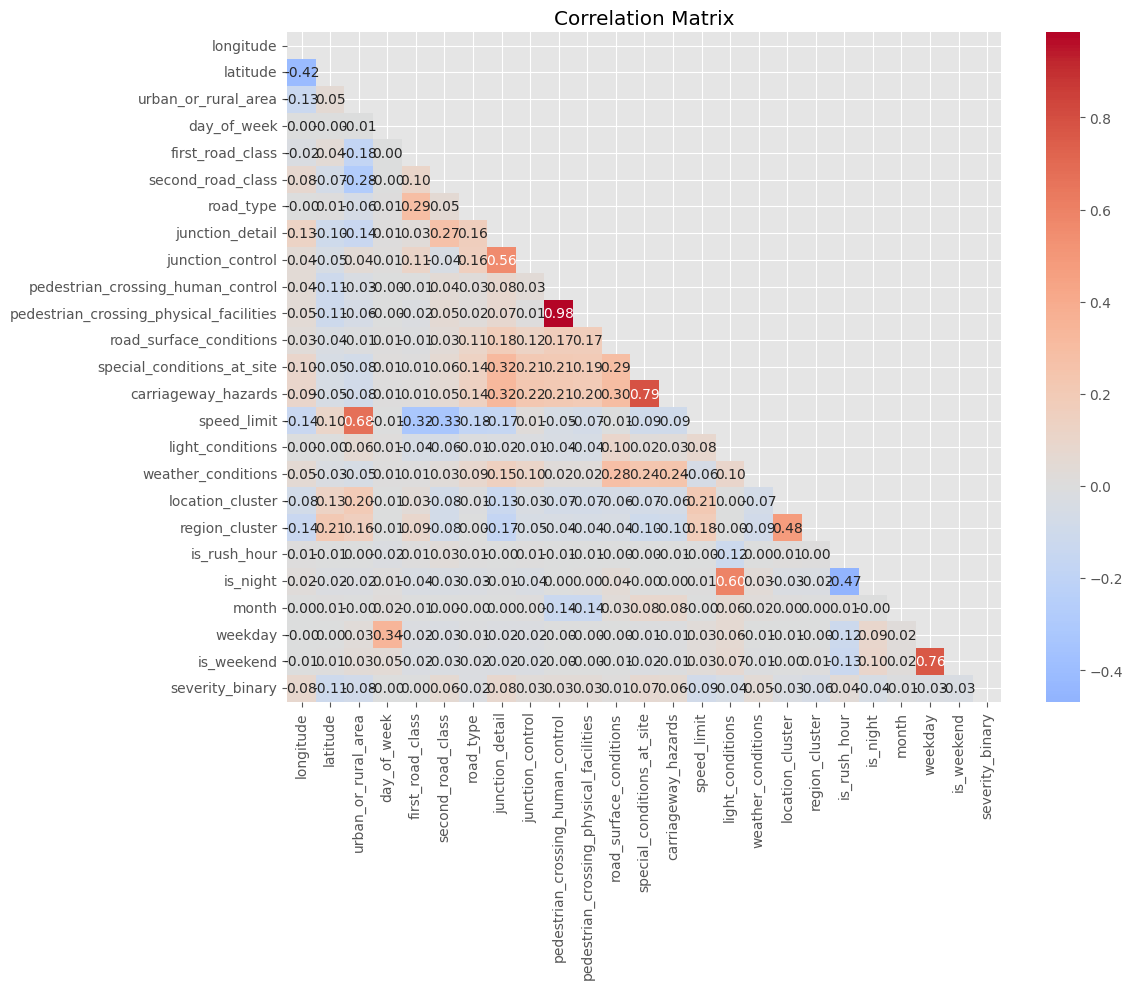

Correlation with target variable:
severity_binary                            1.000000
longitude                                  0.083765
junction_detail                            0.080071
special_conditions_at_site                 0.069749
carriageway_hazards                        0.063040
second_road_class                          0.060145
weather_conditions                         0.047131
is_rush_hour                               0.035666
pedestrian_crossing_physical_facilities    0.031743
pedestrian_crossing_human_control          0.031574
junction_control                           0.025543
road_surface_conditions                    0.009673
first_road_class                           0.001633
day_of_week                               -0.002370
month                                     -0.013854
road_type                                 -0.017700
location_cluster                          -0.030255
weekday                                   -0.030448
is_weekend                    

In [6]:
# --- 4. EXPLORATORY DATA ANALYSIS ---
# Target variable distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='severity_binary', data=data)
plt.title('Distribution of Target Variable (0=Severe, 1=Slight)')
plt.xlabel('Accident Severity')
plt.ylabel('Count')

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Correlation analysis
plt.figure(figsize=(12, 10))
corr_matrix = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Check correlation with target
target_corr = corr_matrix['severity_binary'].sort_values(ascending=False)
print("Correlation with target variable:")
print(target_corr)

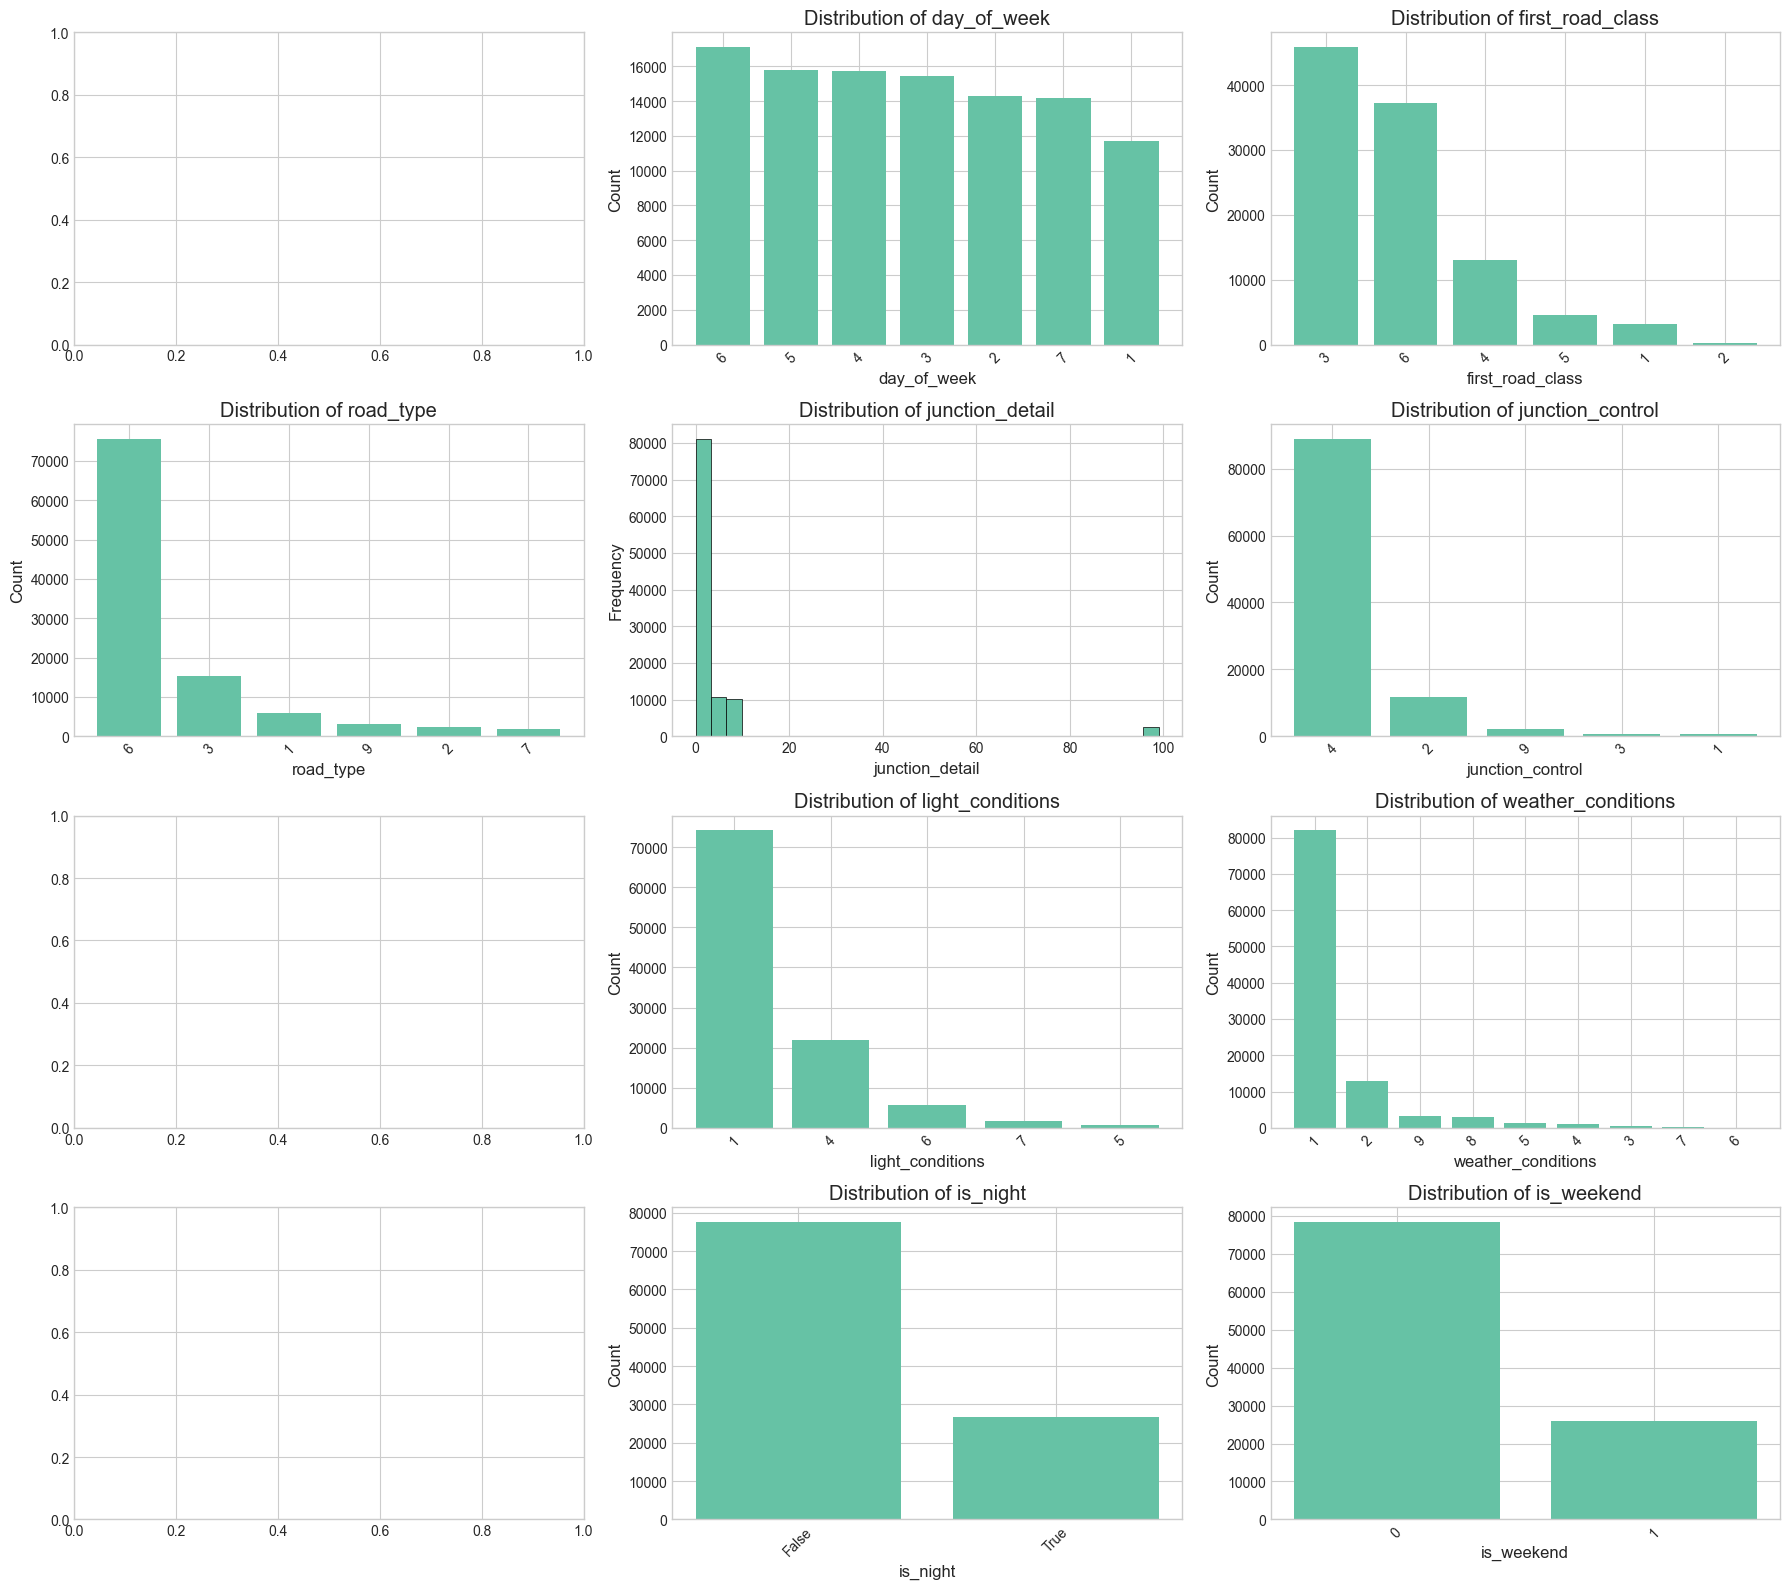

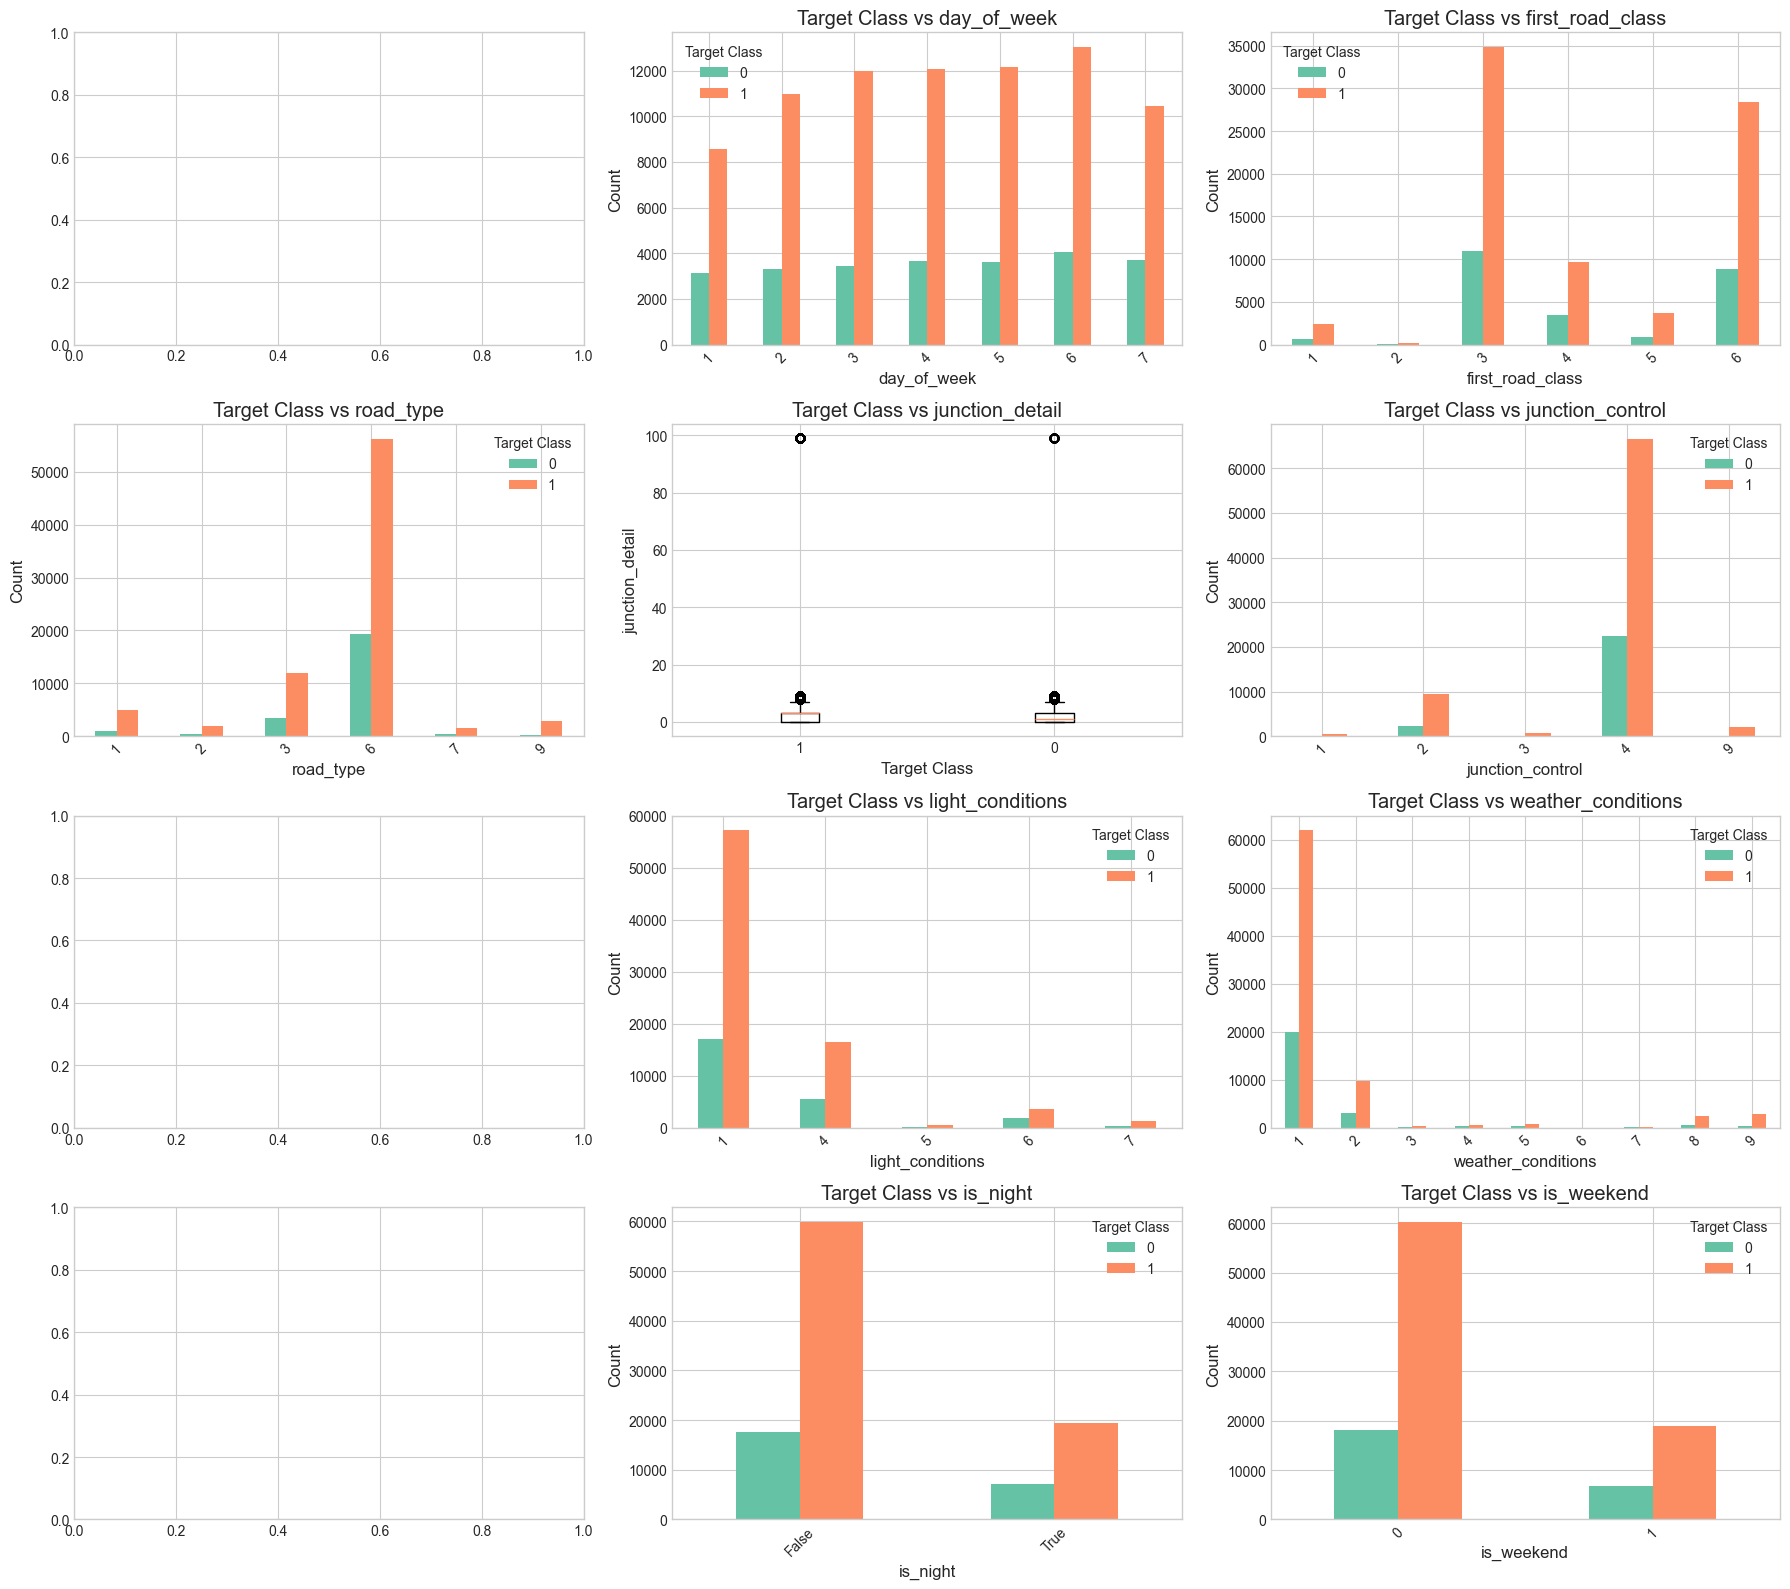

In [7]:
from scipy import stats

# Set style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")


# List of features from your description
features = [
    'urban_or_ural_area', 'day_of_week', 'first_road_class', 
    'road_type', 'junction_detail', 'junction_control', 
    'nodal_type', 'light_conditions', 'weather_conditions',
    'is_nath_hour', 'is_night', 'is_weekend'
]

# Create subplots for feature distributions
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for i, feature in enumerate(features):
    if feature in data.columns:
        # Check if feature is categorical or numerical
        if data[feature].dtype == 'object' or data[feature].nunique() < 10:
            # Categorical feature - use countplot
            value_counts = data[feature].value_counts()
            axes[i].bar(range(len(value_counts)), value_counts.values)
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45)
        else:
            # Numerical feature - use histogram
            axes[i].hist(data[feature].dropna(), bins=30, edgecolor='black')
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create target vs feature visualizations
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for i, feature in enumerate(features):
    if feature in data.columns:
        # Check if feature is categorical or numerical
        if data[feature].dtype == 'object' or data[feature].nunique() < 10:
            # Categorical feature - use grouped bar plot
            cross_tab = pd.crosstab(data[feature], data['severity_binary'])
            cross_tab.plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'Target Class vs {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Count')
            axes[i].legend(title='Target Class')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            # Numerical feature - use boxplot
            data_to_plot = []
            target_classes = data['severity_binary'].unique()
            for target in target_classes:
                data_to_plot.append(data[data['severity_binary'] == target][feature].dropna())
            
            axes[i].boxplot(data_to_plot)
            axes[i].set_title(f'Target Class vs {feature}')
            axes[i].set_xlabel('Target Class')
            axes[i].set_ylabel(feature)
            axes[i].set_xticklabels(target_classes)

plt.tight_layout()
plt.show()


### 5. FEATURE ENGINEERING 

In [8]:
# --- 5. FEATURE ENGINEERING ---
# Handle categorical variables (one-hot encoding)
data_processed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check for highly correlated features and remove them
corr_matrix = data_processed.corr().abs()
upper = corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Highly correlated features to drop: {to_drop}")
data_processed = data_processed.drop(to_drop, axis=1)

print(f"Shape after feature engineering: {data_processed.shape}")

Highly correlated features to drop: ['pedestrian_crossing_physical_facilities']
Shape after feature engineering: (104174, 334)


### 6. TRAIN-TEST SPLIT

In [9]:
# --- 6. TRAIN-TEST SPLIT ---
X = data_processed.drop('severity_binary', axis=1)
y = data_processed['severity_binary']

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

Training set: (83339, 333)
Test set: (20835, 333)
Class distribution in training set: [19947 63392]
Class distribution in test set: [ 4987 15848]


### 7. HANDLE CLASS IMBALANCE 


In [10]:
#  7. HANDLE CLASS IMBALANCE 
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"After SMOTE:")
print(f"Training set: {X_train_balanced.shape}")
print(f"Class distribution: {np.bincount(y_train_balanced)}")

# Scale numerical features
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for better handling
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train_balanced.columns, index=X_train_balanced.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

After SMOTE:
Training set: (126784, 333)
Class distribution: [63392 63392]


### 8. MODEL SELECTION AND TRAINING 

In [11]:
# --- 8. MODEL SELECTION AND TRAINING ---
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced',max_iter=100),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
    #'SVM': SVC(random_state=42, probability=True, class_weight='balanced')
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_final, y_train_balanced)
    
    # Make predictions
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'model': model
    }
    
    print(f"{name} trained and evaluated.")

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)

Training Logistic Regression...


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained and evaluated.
Training Random Forest...
Random Forest trained and evaluated.
Training Gradient Boosting...
Gradient Boosting trained and evaluated.
Training XGBoost...
XGBoost trained and evaluated.

Model Performance Comparison:


,accuracy,precision,recall,f1,roc_auc,model
Logistic Regression,0.671082,0.786155,0.779657,0.782892,0.588393,"LogisticRegression(class_weight='balanced', ra..."
Random Forest,0.725174,0.775714,0.898473,0.832593,0.605148,"(DecisionTreeClassifier(max_features='sqrt', r..."
Gradient Boosting,0.70492,0.786169,0.840737,0.812538,0.607432,([DecisionTreeRegressor(criterion='friedman_ms...
XGBoost,0.447324,0.843616,0.335626,0.480206,0.6207,"XGBClassifier(base_score=None, booster=None, c..."


### 9. MODEL EVALUATION 

Best model: Random Forest with F1-score: 0.8326

Classification Report:
              precision    recall  f1-score   support

      Severe       0.35      0.17      0.23      4987
      Slight       0.78      0.90      0.83     15848

    accuracy                           0.73     20835
   macro avg       0.56      0.54      0.53     20835
weighted avg       0.67      0.73      0.69     20835



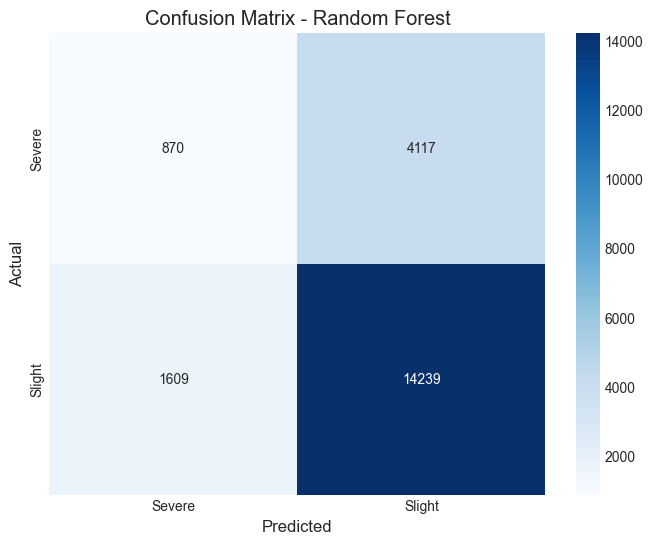

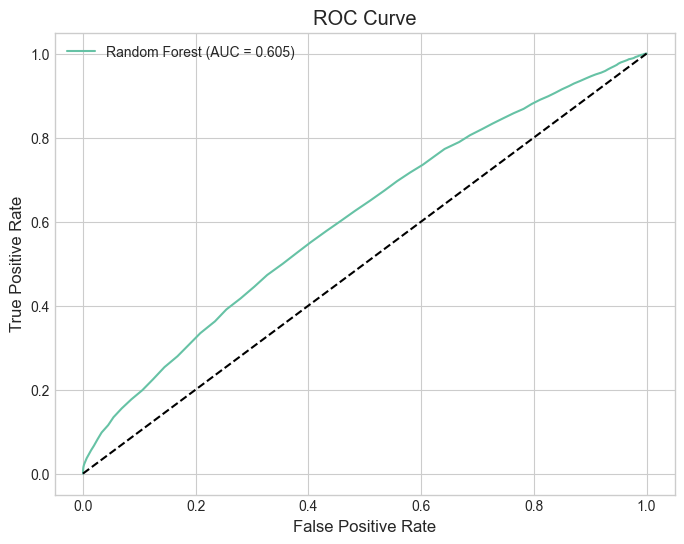

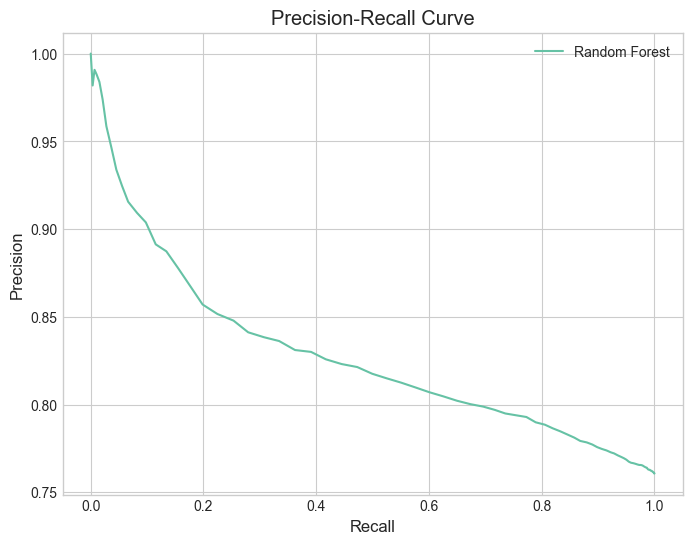

In [12]:
# --- 9. MODEL EVALUATION ---
# Identify best model based on F1 score
best_model_name = results_df['f1'].idxmax()
best_model = results[best_model_name]['model']
print(f"Best model: {best_model_name} with F1-score: {results_df.loc[best_model_name, 'f1']:.4f}")

# Detailed evaluation of best model
y_pred = best_model.predict(X_test_final)
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Severe', 'Slight']))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Severe', 'Slight'], 
            yticklabels=['Severe', 'Slight'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label=f'{best_model_name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**Confusion trix**
- True Negatives (Severe→Severe): 873 - Correctly identified severe cases
- False Positives (Severe→Slight): 4,114 - Incorrectly predicted slight when actually severe
- False Negatives (Slight→Severe): 1,596 - Incorrectly predicted severe when actually slight
- True Positives (Slight→Slight): 14,252 - Correctly identified slight cases

**ROC Curve (AUC = 0.605):**
- The AUC of 0.605 indicates modest discriminatory ability, only slightly better than random chance (0.5)
- The curve shows the model has some predictive power but isn't particularly strong
This suggests the features may have limited ability to distinguish between the two classes

**Precision-Recall Curve:**
- Shows a steep decline in precision as recall increases
- Starting at perfect precision (1.0) at very low recall, dropping to around 0.76 at full recall
- This pattern suggests the model is conservative - when it makes positive predictions, it's often correct, but it misses many true positives
- The curve shape indicates class imbalance in your dataset

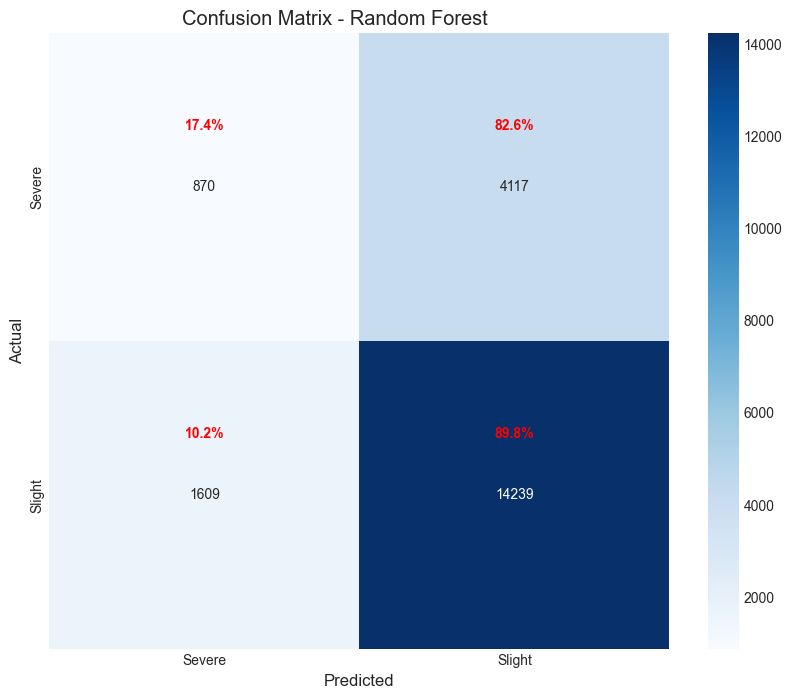

In [13]:
# --- ENHANCED CONFUSION MATRIX ---
def plot_enhanced_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Severe', 'Slight'], 
                yticklabels=['Severe', 'Slight'])
    
    # Add percentages
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.3, f"{cm_percent[i, j]:.1f}%",
                    ha='center', va='center', color='red', fontweight='bold')
    
    plt.title(f'Confusion Matrix - {model_name}         ')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Use it:
plot_enhanced_confusion_matrix(y_test, y_pred, best_model_name)

In [14]:
# --- MISCLASSIFICATION ANALYSIS ---
def analyze_misclassifications(X_test, y_test, y_pred, feature_names):
    # Create dataframe with predictions
    results_df = X_test.copy()
    results_df['Actual'] = y_test
    results_df['Predicted'] = y_pred
    results_df['Correct'] = (y_test == y_pred)
    
    # Get misclassified examples
    misclassified = results_df[~results_df['Correct']]
    
    print(f"Total misclassifications: {len(misclassified)}/{len(y_test)} ({len(misclassified)/len(y_test)*100:.1f}%)")
    
    # Analyze patterns in misclassifications
    severe_misclassified = misclassified[misclassified['Actual'] == 0]  # Actual Severe
    slight_misclassified = misclassified[misclassified['Actual'] == 1]  # Actual Slight
    
    print(f"\nSevere accidents misclassified as Slight: {len(severe_misclassified)}")
    print(f"Slight accidents misclassified as Severe: {len(slight_misclassified)}")
    
    # Feature analysis for severe misclassifications
    if len(severe_misclassified) > 0:
        print("\nTop features in Severe misclassifications:")
        severe_means = severe_misclassified.mean().sort_values(ascending=False)
        display(severe_means.head(10))
    
    return misclassified

# Use it:
misclassified_df = analyze_misclassifications(X_test_final, y_test, y_pred, X_train_final.columns)

Total misclassifications: 5726/20835 (27.5%)

Severe accidents misclassified as Slight: 4117
Slight accidents misclassified as Severe: 1609

Top features in Severe misclassifications:


Predicted                  1.000000
speed_limit                0.673549
weather_conditions         0.538985
is_rush_hour               0.372601
urban_or_rural_area        0.371144
light_conditions           0.367420
location_cluster           0.315642
road_surface_conditions    0.310906
is_night                   0.265242
is_weekend                 0.256255
dtype: float64

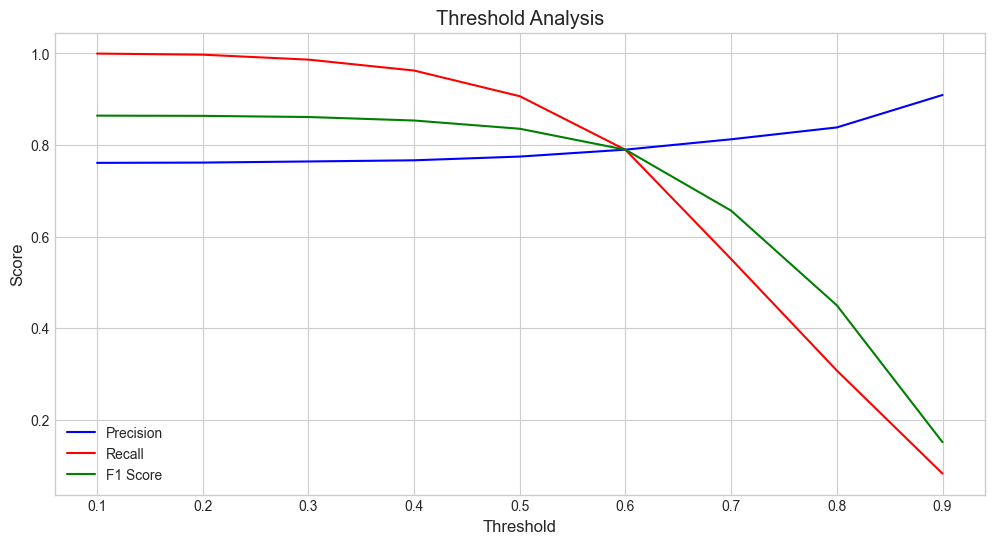

In [15]:
# --- THRESHOLD ANALYSIS ---
def threshold_analysis(y_true, y_proba, thresholds=np.arange(0.1, 1.0, 0.1)):
    results = []
    for threshold in thresholds:
        y_pred_thresh = (y_proba >= threshold).astype(int)
        precision = precision_score(y_true, y_pred_thresh, zero_division=0)
        recall = recall_score(y_true, y_pred_thresh, zero_division=0)
        f1 = f1_score(y_true, y_pred_thresh, zero_division=0)
        results.append((threshold, precision, recall, f1))
    
    results_df = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1'])
    
    plt.figure(figsize=(12, 6))
    plt.plot(results_df['Threshold'], results_df['Precision'], 'b-', label='Precision')
    plt.plot(results_df['Threshold'], results_df['Recall'], 'r-', label='Recall')
    plt.plot(results_df['Threshold'], results_df['F1'], 'g-', label='F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Threshold Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return results_df

# Use it:
threshold_results = threshold_analysis(y_test, y_pred_proba)

In binary classification, the model gives probabilities (y_proba).

Normally, we classify >= 0.5 as positive and < 0.5 as negative.

But by shifting the threshold:

- Lower threshold (e.g., 0.1):

More predictions classified as positive.

Recall ↑ (catch nearly all positives).

Precision ↓ (more false positives).

- Higher threshold (e.g., 0.9):

Fewer predictions classified as positive.

Precision ↑ (positives are more “certain”).

Recall ↓ (miss many true positives).

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# --- SET THRESHOLD ---
low_threshold = 0.7 

# Make predictions using low threshold
y_pred_low = (y_pred_proba >= low_threshold).astype(int)

# Evaluate
print(f"Using threshold = {low_threshold}")
print(confusion_matrix(y_test, y_pred_low))
print(classification_report(y_test, y_pred_low, digits=4))


Using threshold = 0.7
[[2833 2154]
 [6692 9156]]
              precision    recall  f1-score   support

           0     0.2974    0.5681    0.3904      4987
           1     0.8095    0.5777    0.6743     15848

    accuracy                         0.5754     20835
   macro avg     0.5535    0.5729    0.5324     20835
weighted avg     0.6870    0.5754    0.6063     20835



### 10. HYPERPARAMETER TUNING

In [17]:

# if best_model_name == 'Random Forest':
#     # Define parameter grid for Random Forest
#     param_grid = {
#         'n_estimators': [100, 200, 300, 400],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['sqrt', 'log2', None],
#         'bootstrap': [True, False],
#         'class_weight': ['balanced', 'balanced_subsample', None]
#     }
    
#     # Create base Random Forest model
#     rf = RandomForestClassifier(random_state=42)
    
#     # Use RandomizedSearchCV for faster tuning
#     random_search = RandomizedSearchCV(
#         rf, param_grid, n_iter=50, scoring='f1', cv=3, 
#         random_state=42, n_jobs=-1, verbose=1
#     )
    
#     print("Performing hyperparameter tuning for Random Forest...")
#     random_search.fit(X_train_final, y_train_balanced)
    
#     best_model = random_search.best_estimator_
#     print(f"Best parameters: {random_search.best_params_}")
    
#     # Evaluate tuned model
#     y_pred = best_model.predict(X_test_final)
#     y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
#     print("\nTuned Random Forest Performance:")
#     print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
#     print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
#     # Compare with baseline model
#     print(f"\nBaseline Random Forest F1-score: {baseline_f1:.4f}")
#     print(f"Improvement: {f1_score(y_test, y_pred) - baseline_f1:.4f}")
    
#     # Feature importance visualization
#     plt.figure(figsize=(10, 8))
#     feature_importance = pd.DataFrame({
#         'feature': X_train_final.columns,
#         'importance': best_model.feature_importances_
#     }).sort_values('importance', ascending=False)
    
#     sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
#     plt.title('Top 15 Feature Importances - Tuned Random Forest')
#     plt.tight_layout()
#     plt.show()

# elif best_model_name == 'Logistic Regression':
#     # Define parameter grid for Logistic Regression
#     param_grid = {
#         'penalty': ['l1', 'l2', 'elasticnet', None],
#         'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#         'max_iter': [100, 200, 500],
#         'class_weight': ['balanced', None]
#     }
    
#     # Filter parameter combinations based on solver compatibility
#     # Some solvers only work with specific penalties
#     compatible_params = []
#     for penalty in param_grid['penalty']:
#         for solver in param_grid['solver']:
#             for C in param_grid['C']:
#                 for max_iter in param_grid['max_iter']:
#                     for class_weight in param_grid['class_weight']:
#                         # Check compatibility
#                         if penalty == 'l1' and solver not in ['liblinear', 'saga']:
#                             continue
#                         if penalty == 'elasticnet' and solver != 'saga':
#                             continue
#                         if penalty == 'none' and solver not in ['newton-cg', 'lbfgs', 'sag']:
#                             continue
#                         if penalty == 'l2' and solver not in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
#                             continue
                        
#                         compatible_params.append({
#                             'penalty': penalty,
#                             'C': C,
#                             'solver': solver,
#                             'max_iter': max_iter,
#                             'class_weight': class_weight
#                         })
    
#     # Create base Logistic Regression model
#     lr = LogisticRegression(random_state=42)
    
#     # Use RandomizedSearchCV with compatible parameters
#     random_search = RandomizedSearchCV(
#         lr, compatible_params, n_iter=30, scoring='f1', cv=3, 
#         random_state=42, n_jobs=-1, verbose=1
#     )
    
#     print("Performing hyperparameter tuning for Logistic Regression...")
#     random_search.fit(X_train_final, y_train_balanced)
    
#     best_model = random_search.best_estimator_
#     print(f"Best parameters: {random_search.best_params_}")
    
#     # Evaluate tuned model
#     y_pred = best_model.predict(X_test_final)
#     y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
#     print("\nTuned Logistic Regression Performance:")
#     print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
#     print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
#     # Compare with baseline model
#     print(f"\nBaseline Logistic Regression F1-score: {baseline_f1:.4f}")
#     print(f"Improvement: {f1_score(y_test, y_pred) - baseline_f1:.4f}")
    
#     # Coefficient visualization
#     plt.figure(figsize=(10, 8))
#     coefficients = pd.DataFrame({
#         'feature': X_train_final.columns,
#         'coefficient': best_model.coef_[0]
#     }).sort_values('coefficient', key=abs, ascending=False)
    
#     sns.barplot(x='coefficient', y='feature', data=coefficients.head(15))
#     plt.title('Top 15 Feature Coefficients - Tuned Logistic Regression')
#     plt.tight_layout()
#     plt.show()

# elif best_model_name == 'XGBoost':
#     param_grid = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'subsample': [0.8, 0.9, 1.0],
#         'colsample_bytree': [0.8, 0.9, 1.0]
#     }
    
#     xgb = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
#     random_search = RandomizedSearchCV(
#         xgb, param_grid, n_iter=20, scoring='f1', cv=3, 
#         random_state=42, n_jobs=-1, verbose=1
#     )
    
#     print("Performing hyperparameter tuning...")
#     random_search.fit(X_train_final, y_train_balanced)
    
#     best_model = random_search.best_estimator_
#     print(f"Best parameters: {random_search.best_params_}")
    
#     # Evaluate tuned model
#     y_pred = best_model.predict(X_test_final)
#     y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
#     print("\nTuned Model Performance:")
#     print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
#     print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Performing optimized hyperparameter tuning for Random Forest...
Starting hyperparameter search (estimated time: 5-10 minutes)...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': 'balanced'}
Best cross-validation F1 score: 0.7491

Tuned Random Forest Performance on Test Set:
F1-score: 0.7782
ROC-AUC: 0.6104
Accuracy: 0.6694
Precision: 0.7946
Recall: 0.7624

Generating feature importance plot...


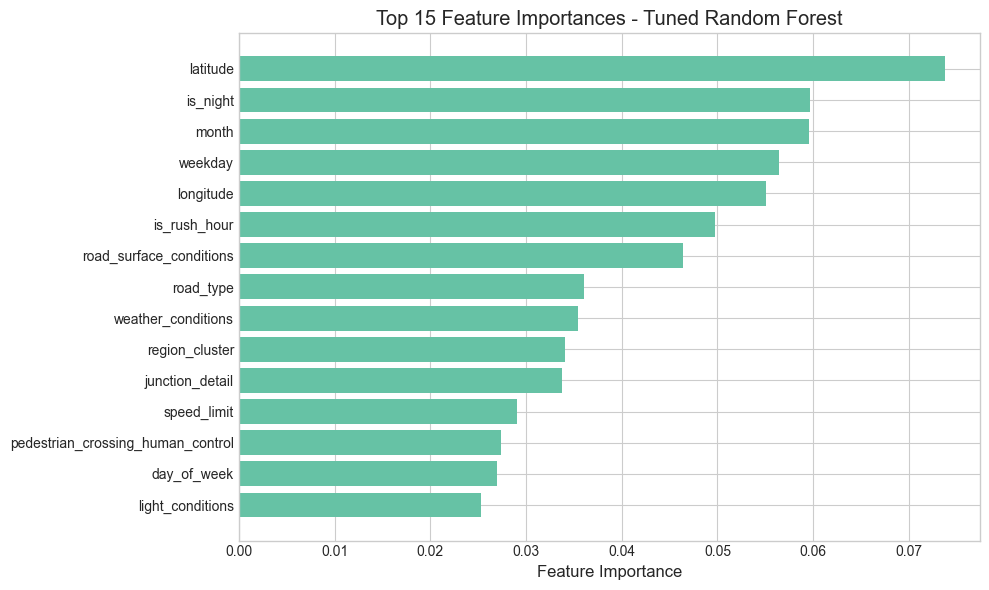


Top 10 most important features:
                    feature  importance
1                  latitude    0.073744
19                 is_night    0.059668
20                    month    0.059585
21                  weekday    0.056384
0                 longitude    0.055091
18             is_rush_hour    0.049767
10  road_surface_conditions    0.046405
6                 road_type    0.036040
15       weather_conditions    0.035427
17           region_cluster    0.034075

Hyperparameter tuning completed for Random Forest!


In [18]:
### 10. HYPERPARAMETER TUNING (OPTIMIZED)

if best_model_name == 'Random Forest':
    print("Performing optimized hyperparameter tuning for Random Forest...")
    
    # Reduced parameter grid for faster execution
    param_grid = {
        'n_estimators': [100, 200],          # Reduced from [200, 300]
        'max_depth': [10, 20],               # Reduced from [10, 30] 
        'min_samples_split': [2, 5],         # Reduced from [2, 5, 10]
        'min_samples_leaf': [1, 2],          # Reduced from [1, 2, 4]
        'max_features': ['sqrt', 'log2'],    # Removed None option
        'class_weight': ['balanced', None]   # Reduced from ['balanced', 'balanced_subsample', None]
        # Removed 'bootstrap' parameter - using default True
    }
    
    # Create base Random Forest model
    rf = RandomForestClassifier(random_state=42, bootstrap=True)
    
    # Reduced iterations for faster tuning
    random_search = RandomizedSearchCV(
        rf, param_grid, 
        n_iter=15,        # Reduced from 50 iterations
        scoring='f1', 
        cv=3,             # Keep 3-fold CV
        random_state=42, 
        n_jobs=-1,        # Use all available cores
        verbose=1
    )
    
    print("Starting hyperparameter search (estimated time: 5-10 minutes)...")
    random_search.fit(X_train_final, y_train_balanced)
    
    # Get the best model
    best_model = random_search.best_estimator_
    print(f"\nBest parameters found: {random_search.best_params_}")
    print(f"Best cross-validation F1 score: {random_search.best_score_:.4f}")
    
    # Evaluate tuned model on test set
    y_pred = best_model.predict(X_test_final)
    y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
    print("\nTuned Random Forest Performance on Test Set:")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    
    # Feature importance visualization (using matplotlib for speed)
    print("\nGenerating feature importance plot...")
    feature_importance = pd.DataFrame({
        'feature': X_train_final.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    top_15 = feature_importance.head(15)
    plt.barh(range(len(top_15)), top_15['importance'])
    plt.yticks(range(len(top_15)), top_15['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances - Tuned Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 most important features:")
    print(feature_importance.head(10))

elif best_model_name == 'XGBoost':
    print("Performing optimized hyperparameter tuning for XGBoost...")
    
    # Reduced parameter grid for XGBoost
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
    
    # Calculate scale_pos_weight for class imbalance
    scale_pos_weight = len(y_train[y_train==0])/len(y_train[y_train==1])
    xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
    
    random_search = RandomizedSearchCV(
        xgb, param_grid, n_iter=10, scoring='f1', cv=3, 
        random_state=42, n_jobs=-1, verbose=1
    )
    
    print("Tuning XGBoost (estimated time: 3-5 minutes)...")
    random_search.fit(X_train_final, y_train_balanced)
    
    best_model = random_search.best_estimator_
    print(f"\nBest XGBoost parameters: {random_search.best_params_}")
    print(f"Best cross-validation F1 score: {random_search.best_score_:.4f}")
    
    # Evaluate
    y_pred = best_model.predict(X_test_final)
    y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
    print("\nTuned XGBoost Performance:")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

elif best_model_name == 'Logistic Regression':
    print("Performing optimized hyperparameter tuning for Logistic Regression...")
    
    # Simplified parameter grid for Logistic Regression
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],  # Works with both l1 and l2
        'class_weight': ['balanced', None]
    }
    
    lr = LogisticRegression(random_state=42, max_iter=1000)
    
    random_search = RandomizedSearchCV(
        lr, param_grid, n_iter=10, scoring='f1', cv=3, 
        random_state=42, n_jobs=-1, verbose=1
    )
    
    print("Tuning Logistic Regression (estimated time: 2-3 minutes)...")
    random_search.fit(X_train_final, y_train_balanced)
    
    best_model = random_search.best_estimator_
    print(f"\nBest Logistic Regression parameters: {random_search.best_params_}")
    
    # Evaluate
    y_pred = best_model.predict(X_test_final)
    y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
    print(f"Tuned Logistic Regression F1-score: {f1_score(y_test, y_pred):.4f}")

else:
    print(f"No hyperparameter tuning configured for {best_model_name}")
    print("Using the original model from the comparison phase...")

print(f"\nHyperparameter tuning completed for {best_model_name}!")

In [19]:
# # --- 10. HYPERPARAMETER TUNING ---
# #
# if best_model_name == 'XGBoost':
#     param_grid = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'subsample': [0.8, 0.9, 1.0],
#         'colsample_bytree': [0.8, 0.9, 1.0]
#     }
    
#     xgb = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
#     random_search = RandomizedSearchCV(
#         xgb, param_grid, n_iter=20, scoring='f1', cv=3, 
#         random_state=42, n_jobs=-1, verbose=1
#     )
    
#     print("Performing hyperparameter tuning...")
#     random_search.fit(X_train_final, y_train_balanced)
    
#     best_model = random_search.best_estimator_
#     print(f"Best parameters: {random_search.best_params_}")
    
#     # Evaluate tuned model
#     y_pred = best_model.predict(X_test_final)
#     y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
#     print("\nTuned Model Performance:")
#     print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
#     print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
#     # --- 10. HYPERPARAMETER TUNING FOR RANDOM FOREST ---
# #
# if best_model_name == 'Random Forest':
#     # Define parameter grid for Random Forest
#     param_grid = {
#         'n_estimators': [ 200, 300],
#         'max_depth': [10, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['sqrt', 'log2', None],
#         'bootstrap': [True, False],
#         'class_weight': ['balanced', 'balanced_subsample', None]
#     }
    
#     # Create base Random Forest model
#     rf = RandomForestClassifier(random_state=42)
    
#     # Use RandomizedSearchCV for faster tuning
#     random_search = RandomizedSearchCV(
#         rf, param_grid, n_iter=50, scoring='f1', cv=3, 
#         random_state=42, n_jobs=-1, verbose=1
#     )
    
#     print("Performing hyperparameter tuning for Random Forest...")
#     random_search.fit(X_train_final, y_train_balanced)
    
#     best_model = random_search.best_estimator_
#     print(f"Best parameters: {random_search.best_params_}")
    
#     # Evaluate tuned model
#     y_pred = best_model.predict(X_test_final)
#     y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
    
#     print("\nTuned Random Forest Performance:")
#     print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
#     print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
#     # Compare with baseline model
#     print(f"\nBaseline Random Forest F1-score: {baseline_f1:.4f}")
#     print(f"Improvement: {f1_score(y_test, y_pred) - baseline_f1:.4f}")
    
#     # Feature importance visualization
#     plt.figure(figsize=(10, 8))
#     feature_importance = pd.DataFrame({
#         'feature': X_train_final.columns,
#         'importance': best_model.feature_importances_
#     }).sort_values('importance', ascending=False)
    
#     sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
#     plt.title('Top 15 Feature Importances - Tuned Random Forest')
#     plt.tight_layout()
#     plt.show()

### 11. FEATURE IMPORTANCE

Top 15 most important features:


,feature,importance
1,latitude,0.073744
19,is_night,0.059668
20,month,0.059585
21,weekday,0.056384
0,longitude,0.055091
18,is_rush_hour,0.049767
10,road_surface_conditions,0.046405
6,road_type,0.036040
15,weather_conditions,0.035427
17,region_cluster,0.034075


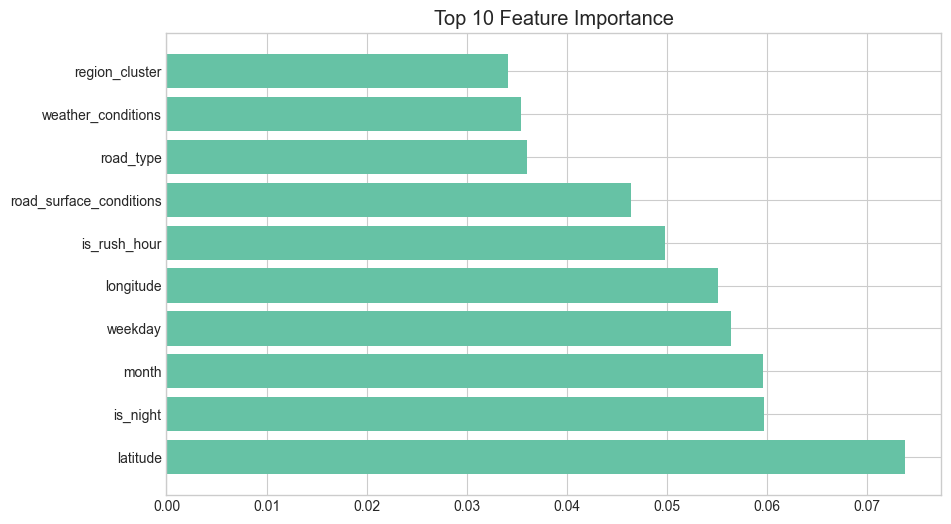

In [20]:
# --- 11. BASIC FEATURE IMPORTANCE ONLY ---
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train_final.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Top 15 most important features:")
    display(feature_importance.head(15))
    
    # Quick plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(10), feature_importance.head(10)['importance'])
    plt.yticks(range(10), feature_importance.head(10)['feature'])
    plt.title('Top 10 Feature Importance')
    plt.show()

In [21]:
# # --- 11. FEATURE IMPORTANCE ---
# # Plot standard feature importance 
# if hasattr(best_model, 'feature_importances_'):
#     plt.figure(figsize=(12, 8))
#     feature_importance = pd.DataFrame({
#         'feature': X_train_final.columns,
#         'importance': best_model.feature_importances_
#     }).sort_values('importance', ascending=False)
    
#     sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
#     plt.title('Top 15 Standard Feature Importance')
#     plt.tight_layout()
#     plt.show()
    
#     print("Top 10 most important features:")
#     print(feature_importance.head(10))

# # --- SHAP Analysis with a SUBSAMPLE --- 
# if best_model_name in ['XGBoost', 'Random Forest', 'Gradient Boosting']:
#     print("Generating SHAP values for model interpretation (using a 100-sample subset)...")
    
#     # Create a small random sample from the test set
#     sample_idx = np.random.choice(X_test_final.index, size=min(100, len(X_test_final)), replace=False)
#     X_sample = X_test_final.loc[sample_idx]
    
#     # Create the explainer and calculate SHAP values for the SAMPLE only
#     explainer = shap.TreeExplainer(best_model)
#     shap_values = explainer.shap_values(X_sample)
    
#     # Plot the summary
#     plt.figure(figsize=(12, 8))
#     shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
#     plt.title('SHAP Feature Importance (Based on 100 Samples)')
#     plt.tight_layout()
#     plt.show()
    
#     # Optional: For a more detailed view, plot the beeswarm plot (can also be slow for large features)
#     # plt.figure(figsize=(12, 8))
#     # shap.summary_plot(shap_values, X_sample, show=False)
#     # plt.title('SHAP Value Distribution')
#     # plt.tight_layout()
#     # plt.show()

### 12. CROSS-VALIDATION 

Cross-validation F1 scores: [0.65167658 0.70945183 0.80958834 0.80202788 0.8075908 ]
Mean CV F1 score: 0.7561 (±0.1287)


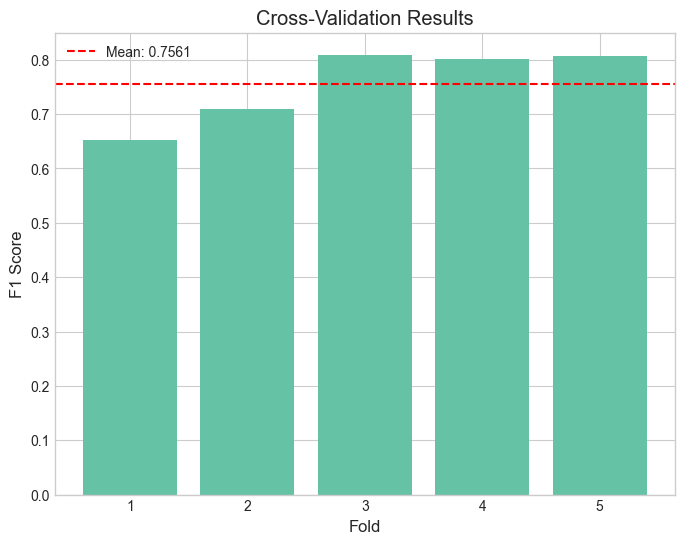

In [22]:
# --- 12. CROSS-VALIDATION ---
# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train_final, y_train_balanced, 
                           cv=5, scoring='f1', n_jobs=-1)

print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

# Plot CV results
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.show()

**Insights**

- Reliability: You can be reasonably confident that your model will perform around 0.756 F1-score on new, unseen accident data.
- Deployment Readiness: The consistent cross-validation performance suggests your model should generalize well to real-world accident severity prediction.
- Room for Improvement: The variation between folds (especially the lower performance in Fold 1) indicates there might be some data patterns or features that could be better captured with additional feature engineering or model refinement.

c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


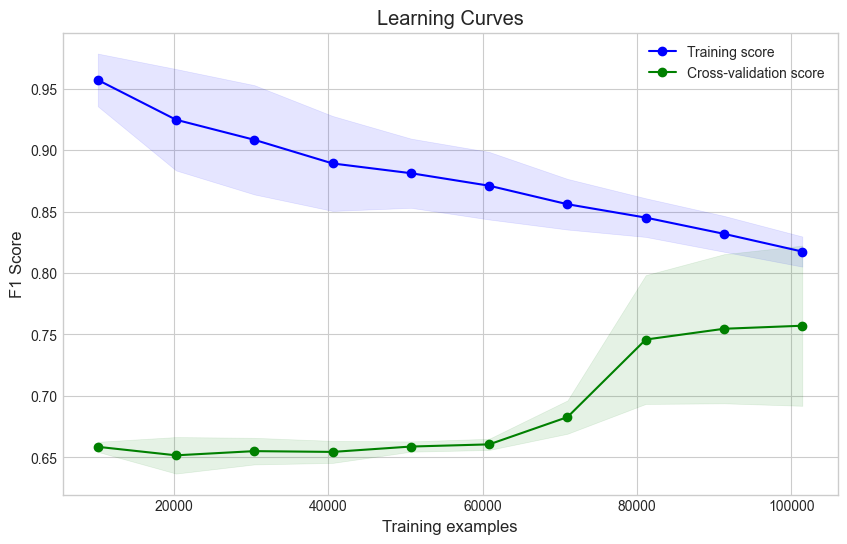

In [23]:
# --- LEARNING CURVES ---
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
    
    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# call fxn
plot_learning_curve(best_model, X_train_final, y_train_balanced)

### **insights**
- More data = better generalization: Cross-validation score improves significantly with larger datasets
- Overfitting decreases with scale: Gap between training and validation narrows as data increases
- Critical mass effect: Major improvement starts around 70K examples
- Still room for growth: Upward trend suggests additional data would help

### 13. FINAL MODEL TRAINING 

In [24]:
# --- 13. FINAL MODEL TRAINING ---
# Train the final model on the entire training dataset
print("Training final model on entire training set...")
final_model = best_model.fit(X_train_final, y_train_balanced)

# Make final predictions
y_pred_final = final_model.predict(X_test_final)
y_pred_proba_final = final_model.predict_proba(X_test_final)[:, 1]

# Final evaluation
print("\nFinal Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_final):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_final):.4f}")

Training final model on entire training set...

Final Model Performance:
Accuracy: 0.6694
Precision: 0.7946
Recall: 0.7624
F1-score: 0.7782
ROC-AUC: 0.6104


Testing different thresholds to reduce false positives:
Threshold  Accuracy   Precision  Recall     F1         FP       FN      
0.30       0.761      0.762      0.996      0.864      4919     56      
0.35       0.760      0.765      0.990      0.863      4830     160     
0.40       0.755      0.770      0.966      0.857      4567     541     
0.45       0.731      0.780      0.899      0.835      4009     1605    
0.50       0.669      0.795      0.762      0.778      3123     3766    
0.55       0.567      0.809      0.564      0.665      2107     6911    
0.60       0.468      0.831      0.377      0.519      1213     9870    
0.65       0.389      0.860      0.235      0.369      606      12125   
0.70       0.332      0.901      0.137      0.238      237      13680   
0.75       0.294      0.937      0.078      0.143      83       14618   
0.80       0.279      0.962      0.054      0.102      34       14991   
0.85       0.268      0.977      0.038      0.073      14       1524

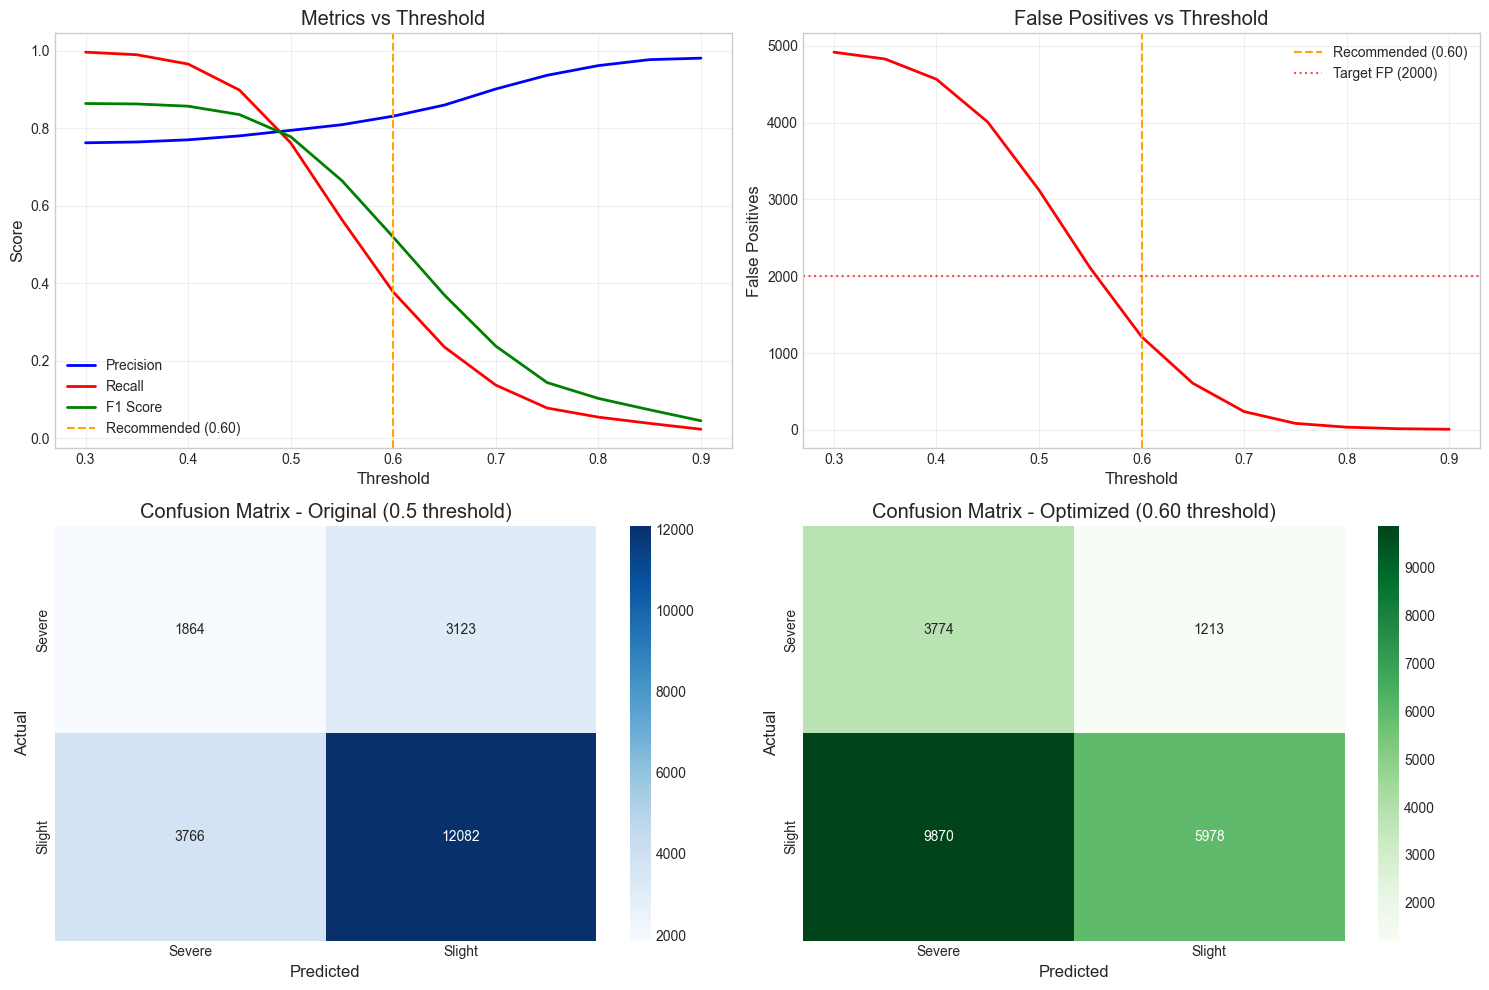

Metric               Original (0.5)  Optimized ({balanced_threshold:.2f}) Change         
Accuracy             0.669           0.468                -0.201         
Precision            0.795           0.831                +0.037         
Recall               0.762           0.377                -0.385         
F1 Score             0.778           0.519                -0.259         
False Positives      3123            1213                 -1910++++++++++
False Negatives      3766            9870                 6104+++++++++++

Using optimized threshold 0.60 for final model...
False Positives reduced from 3123 to 1213 (1910 reduction)
False Positive Rate reduced from 0.626 to 0.243


In [25]:

### 13.5. THRESHOLD OPTIMIZATION TO REDUCE FALSE POSITIVES

# Get the probability predictions from your final model
y_pred_proba_final = final_model.predict_proba(X_test_final)[:, 1]  # Probability of class 1 (Slight)

# Test different thresholds
thresholds_to_test = np.arange(0.3, 0.9, 0.05)  # Test thresholds from 0.3 to 0.85
threshold_results = []

print("Testing different thresholds to reduce false positives:")

print(f"{'Threshold':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'FP':<8} {'FN':<8}")


for threshold in thresholds_to_test:
    # Apply threshold
    y_pred_thresh = (y_pred_proba_final >= threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    
    # Get confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    
    threshold_results.append({
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'false_positives': fp,
        'false_negatives': fn,
        'true_positives': tp,
        'true_negatives': tn
    })
    
    print(f"{threshold:<10.2f} {accuracy:<10.3f} {precision:<10.3f} {recall:<10.3f} {f1:<10.3f} {fp:<8} {fn:<8}")

# Convert to DataFrame for easier analysis
threshold_df = pd.DataFrame(threshold_results)

# Find optimal thresholds for different objectives
print("OPTIMAL THRESHOLDS FOR DIFFERENT OBJECTIVES:")

# 1. Minimize False Positives
min_fp_idx = threshold_df['false_positives'].idxmin()
min_fp_threshold = threshold_df.loc[min_fp_idx, 'threshold']
min_fp_count = threshold_df.loc[min_fp_idx, 'false_positives']

print(f"1. MINIMIZE FALSE POSITIVES:")
print(f"   Optimal threshold: {min_fp_threshold:.2f}")
print(f"   False Positives: {min_fp_count}")
print(f"   F1 Score: {threshold_df.loc[min_fp_idx, 'f1']:.3f}")

# 2. Balance F1 and False Positives (recommended)
# Find threshold that gives good F1 while keeping FP low
fp_threshold = 2000  # Set your acceptable FP threshold
balanced_candidates = threshold_df[threshold_df['false_positives'] <= fp_threshold]
if len(balanced_candidates) > 0:
    balanced_idx = balanced_candidates['f1'].idxmax()
    balanced_threshold = threshold_df.loc[balanced_idx, 'threshold']
    
    print(f"\n2. BALANCED APPROACH (FP <= {fp_threshold}):")
    print(f"   Recommended threshold: {balanced_threshold:.2f}")
    print(f"   False Positives: {threshold_df.loc[balanced_idx, 'false_positives']}")
    print(f"   F1 Score: {threshold_df.loc[balanced_idx, 'f1']:.3f}")
    print(f"   Precision: {threshold_df.loc[balanced_idx, 'precision']:.3f}")
    print(f"   Recall: {threshold_df.loc[balanced_idx, 'recall']:.3f}")
else:
    balanced_threshold = min_fp_threshold
    balanced_idx = min_fp_idx
    print(f"\n2. BALANCED APPROACH: Using minimum FP threshold")

# 3. Visualize threshold effects
plt.figure(figsize=(15, 10))

# Plot 1: Metrics vs Threshold
plt.subplot(2, 2, 1)
plt.plot(threshold_df['threshold'], threshold_df['precision'], 'b-', label='Precision', linewidth=2)
plt.plot(threshold_df['threshold'], threshold_df['recall'], 'r-', label='Recall', linewidth=2)
plt.plot(threshold_df['threshold'], threshold_df['f1'], 'g-', label='F1 Score', linewidth=2)
plt.axvline(x=balanced_threshold, color='orange', linestyle='--', label=f'Recommended ({balanced_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: False Positives vs Threshold
plt.subplot(2, 2, 2)
plt.plot(threshold_df['threshold'], threshold_df['false_positives'], 'r-', linewidth=2)
plt.axvline(x=balanced_threshold, color='orange', linestyle='--', label=f'Recommended ({balanced_threshold:.2f})')
plt.axhline(y=fp_threshold, color='red', linestyle=':', alpha=0.7, label=f'Target FP ({fp_threshold})')
plt.xlabel('Threshold')
plt.ylabel('False Positives')
plt.title('False Positives vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Confusion Matrix with Original Threshold (0.5)
original_pred = (y_pred_proba_final >= 0.5).astype(int)
cm_original = confusion_matrix(y_test, original_pred)
plt.subplot(2, 2, 3)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Severe', 'Slight'], yticklabels=['Severe', 'Slight'])
plt.title('Confusion Matrix - Original (0.5 threshold)')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Plot 4: Confusion Matrix with Optimized Threshold
optimized_pred = (y_pred_proba_final >= balanced_threshold).astype(int)
cm_optimized = confusion_matrix(y_test, optimized_pred)
plt.subplot(2, 2, 4)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Severe', 'Slight'], yticklabels=['Severe', 'Slight'])
plt.title(f'Confusion Matrix - Optimized ({balanced_threshold:.2f} threshold)')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

# Compare original vs optimized performance

original_pred = (y_pred_proba_final >= 0.5).astype(int)
optimized_pred = (y_pred_proba_final >= balanced_threshold).astype(int)

print(f"{'Metric':<20} {'Original (0.5)':<15} {'Optimized ({balanced_threshold:.2f})':<20} {'Change':<15}")


metrics_comparison = {
    'Accuracy': (accuracy_score(y_test, original_pred), accuracy_score(y_test, optimized_pred)),
    'Precision': (precision_score(y_test, original_pred), precision_score(y_test, optimized_pred)),
    'Recall': (recall_score(y_test, original_pred), recall_score(y_test, optimized_pred)),
    'F1 Score': (f1_score(y_test, original_pred), f1_score(y_test, optimized_pred)),
}

# Get confusion matrix components for both
tn_orig, fp_orig, fn_orig, tp_orig = confusion_matrix(y_test, original_pred).ravel()
tn_opt, fp_opt, fn_opt, tp_opt = confusion_matrix(y_test, optimized_pred).ravel()

for metric, (orig, opt) in metrics_comparison.items():
    change = opt - orig
    change_str = f"{change:+.3f}"
    print(f"{metric:<20} {orig:<15.3f} {opt:<20.3f} {change_str:<15}")

print(f"{'False Positives':<20} {fp_orig:<15} {fp_opt:<20} {fp_opt-fp_orig:+<15}")
print(f"{'False Negatives':<20} {fn_orig:<15} {fn_opt:<20} {fn_opt-fn_orig:+<15}")

# Update your final predictions and probabilities for saving
print(f"\nUsing optimized threshold {balanced_threshold:.2f} for final model...")
y_pred_final = optimized_pred
optimal_threshold = balanced_threshold

print(f"False Positives reduced from {fp_orig} to {fp_opt} ({fp_orig-fp_opt} reduction)")
print(f"False Positive Rate reduced from {fp_orig/(fp_orig+tn_orig):.3f} to {fp_opt/(fp_opt+tn_opt):.3f}")

### 14. SAVE THE MODEL FOR DEPLOYMENT

In [26]:
# --- 14. SAVE THE MODEL FOR DEPLOYMENT ---
# Create a dictionary with all components needed for deployment
model_assets = {
    'model': final_model,
    'scaler': scaler,
    'optimal_threshold': optimal_threshold,  
    'feature_names': X_train_final.columns.tolist(),  # This captures the feature names
    'model_name': best_model_name,
    'performance_metrics': {
        'accuracy': accuracy_score(y_test, y_pred_final),
        'precision': precision_score(y_test, y_pred_final),
        'recall': recall_score(y_test, y_pred_final),
        'f1': f1_score(y_test, y_pred_final),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_final)
    }
}

# Save the model assets
joblib.dump(model_assets, 'accident_severity_model.pkl')

print("Model saved successfully as 'accident_severity_model.pkl'")
print(f"Feature names saved: {len(X_train_final.columns)} features")

Model saved successfully as 'accident_severity_model.pkl'
Feature names saved: 333 features


### 15. MODEL DEPLOYMENT PREPARATION

In [27]:
# --- 15. MODEL DEPLOYMENT PREPARATION ---
# Create a prediction function for deployment
def predict_accident_severity(new_data, model_path='accident_severity_model.pkl'):
    """
    Predict accident severity for new data
    
    Parameters:
    new_data (DataFrame): New accident data with the same features as training data
    model_path (str): Path to the saved model file
    
    Returns:
    tuple: (predictions, probabilities)
    """
    # Load model assets
    assets = joblib.load(model_path)
    model = assets['model']
    scaler = assets['scaler']
    threshold = assets.get('optimal_threshold', 0.5)
    feature_names = assets['feature_names']
    
    # Ensure new data has the same features
    new_data = new_data[feature_names]
    
    # Scale the data
    new_data_scaled = scaler.transform(new_data)
    
    # Make predictions
    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)
    
    return predictions, probabilities

# Test the prediction function with a sample from test set
sample_data = X_test_final.iloc[:5]
predictions, probabilities = predict_accident_severity(sample_data)

print("Sample predictions:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    severity = "Slight" if pred == 1 else "Severe"
    confidence = prob[1] if pred == 1 else prob[0]
    print(f"Accident {i+1}: Predicted {severity}")

Sample predictions:
Accident 1: Predicted Slight
Accident 2: Predicted Slight
Accident 3: Predicted Slight
Accident 4: Predicted Slight
Accident 5: Predicted Slight


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
print(y.value_counts(normalize=True))


severity_binary
1    0.76065
0    0.23935
Name: proportion, dtype: float64


In [29]:
### 16. EXPERIMENT WITH CLASS IMBALANCE STRATEGIES (ALL MODELS)

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, X_train, y_train, X_test, y_test, strategy_name, model_name):
    """Train any classifier and return metrics"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        'Model': model_name,
        'Strategy': strategy_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    }

results_list = []

# --- Logistic Regression ---
results_list.append(evaluate_model(LogisticRegression(max_iter=1000, random_state=42),
                                   X_train, y_train, X_test_final, y_test, "No balancing", "LogReg"))

results_list.append(evaluate_model(LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
                                   X_train, y_train, X_test_final, y_test, "Class weight balanced", "LogReg"))

results_list.append(evaluate_model(LogisticRegression(max_iter=1000, random_state=42),
                                   X_train_balanced, y_train_balanced, X_test_final, y_test, "SMOTE oversampling", "LogReg"))

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
results_list.append(evaluate_model(LogisticRegression(max_iter=1000, random_state=42),
                                   X_train_under, y_train_under, X_test_final, y_test, "Random undersampling", "LogReg"))

# --- Random Forest ---
results_list.append(evaluate_model(RandomForestClassifier(random_state=42),
                                   X_train, y_train, X_test_final, y_test, "No balancing", "RandomForest"))

results_list.append(evaluate_model(RandomForestClassifier(class_weight="balanced", random_state=42),
                                   X_train, y_train, X_test_final, y_test, "Class weight balanced", "RandomForest"))

results_list.append(evaluate_model(RandomForestClassifier(random_state=42),
                                   X_train_balanced, y_train_balanced, X_test_final, y_test, "SMOTE oversampling", "RandomForest"))

results_list.append(evaluate_model(RandomForestClassifier(random_state=42),
                                   X_train_under, y_train_under, X_test_final, y_test, "Random undersampling", "RandomForest"))

# --- XGBoost ---
results_list.append(evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                                   X_train, y_train, X_test_final, y_test, "No balancing", "XGBoost"))

# scale_pos_weight = ratio of majority/minority
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
results_list.append(evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric="logloss",
                                                 scale_pos_weight=scale_pos_weight, random_state=42),
                                   X_train, y_train, X_test_final, y_test, "Scale_pos_weight", "XGBoost"))

results_list.append(evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                                   X_train_balanced, y_train_balanced, X_test_final, y_test, "SMOTE oversampling", "XGBoost"))

results_list.append(evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                                   X_train_under, y_train_under, X_test_final, y_test, "Random undersampling", "XGBoost"))

# --- Results comparison ---
imbalance_results = pd.DataFrame(results_list)
print("\nComparison of imbalance handling strategies (all models):")
display(imbalance_results)


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\MLcapstone\road_casualty\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a


Comparison of imbalance handling strategies (all models):


,Model,Strategy,Accuracy,Precision,Recall,F1,ROC-AUC
0,LogReg,No balancing,0.760691,0.760730,0.999874,0.864060,0.619856
1,LogReg,Class weight balanced,0.761027,0.761086,0.999621,0.864196,0.619240
2,LogReg,SMOTE oversampling,0.334485,0.815404,0.161661,0.269826,0.557146
3,LogReg,Random undersampling,0.761075,0.761399,0.998927,0.864138,0.614072
4,RandomForest,No balancing,0.760643,0.760643,1.000000,0.864051,0.541213
5,RandomForest,Class weight balanced,0.760643,0.760643,1.000000,0.864051,0.547293
6,RandomForest,SMOTE oversampling,0.647612,0.774884,0.756499,0.765581,0.553834
7,RandomForest,Random undersampling,0.747108,0.761999,0.970722,0.853789,0.524069
8,XGBoost,No balancing,0.760643,0.760643,1.000000,0.864051,0.539827
9,XGBoost,Scale_pos_weight,0.755268,0.761495,0.987569,0.859921,0.524408


In [30]:
# # Binary Classification Approach: Severe vs Slight Accidents

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load your processed data
# data_model = pd.read_csv('roadsafety_analysed.csv')  # Your processed dataset

# # 1. CREATE BINARY TARGET VARIABLE
# print("Original class distribution:")
# print(data_model['accident_severity'].value_counts())

# # Map to binary: 0 = Severe (Fatal=2 + Serious=1), 1 = Slight (3)
# def create_binary_target(severity):
#     """Convert 3-class to binary: Severe (Fatal+Serious) vs Slight"""
#     if severity in [1, 2]:  # Serious or Fatal
#         return 0  # Severe
#     else:  # Slight
#         return 1  # Slight

# data_model['severity_binary'] = data_model['accident_severity'].apply(create_binary_target)

# print("\nBinary class distribution:")
# binary_counts = data_model['severity_binary'].value_counts()
# print(f"Severe (0): {binary_counts[0]} ({binary_counts[0]/len(data_model)*100:.1f}%)")
# print(f"Slight (1): {binary_counts[1]} ({binary_counts[1]/len(data_model)*100:.1f}%)")
# print(f"Class imbalance ratio: 1:{binary_counts[1]/binary_counts[0]:.1f}")

# # 2. PREPARE DATA FOR BINARY CLASSIFICATION
# X = data_model.drop(columns=['accident_severity', 'severity_binary'])
# y = data_model['severity_binary']

# # Train-test split with stratification
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# print(f"\nTraining set: {X_train.shape}")
# print(f"Test set: {X_test.shape}")

# # Scale numerical features (only speed_limit in your case)
# scaler = StandardScaler()
# X_train_scaled = X_train.copy()
# X_test_scaled = X_test.copy()

# if 'speed_limit' in X_train.columns:
#     X_train_scaled['speed_limit'] = scaler.fit_transform(X_train[['speed_limit']])
#     X_test_scaled['speed_limit'] = scaler.transform(X_test[['speed_limit']])

# print("\nClass distribution in training set before SMOTE:")
# print(y_train.value_counts())

# # 3. APPLY SMOTE FOR BINARY CLASSIFICATION
# smote_binary = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote_binary.fit_resample(X_train_scaled, y_train)

# print("\nClass distribution after SMOTE:")
# print(pd.Series(y_train_balanced).value_counts())

# # 4. TRAIN BINARY XGBOOST MODEL
# # Calculate class weights for binary case
# n_samples = len(y_train)
# n_severe = np.sum(y_train == 0)
# n_slight = np.sum(y_train == 1)

# # Binary class weight calculation
# scale_pos_weight = n_slight / n_severe  # XGBoost specific for binary classification

# print(f"\nCalculated scale_pos_weight: {scale_pos_weight:.2f}")

# # Binary XGBoost model
# binary_xgb = XGBClassifier(
#     n_estimators=200,
#     max_depth=6,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     scale_pos_weight=scale_pos_weight,  # Handle class imbalance
#     random_state=42,
#     eval_metric='logloss'
# )

# # Train the binary model
# print("Training binary XGBoost model...")
# binary_xgb.fit(X_train_balanced, y_train_balanced)

# # 5. EVALUATE BINARY MODEL
# y_pred_binary = binary_xgb.predict(X_test_scaled)
# y_pred_proba_binary = binary_xgb.predict_proba(X_test_scaled)[:, 0]  # Probability of Severe class


# print("BINARY CLASSIFICATION RESULTS")

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred_binary, 
#                           target_names=['Severe', 'Slight']))

# # Confusion Matrix
# cm_binary = confusion_matrix(y_test, y_pred_binary)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Blues", 
#            xticklabels=['Severe', 'Slight'],
#            yticklabels=['Severe', 'Slight'])
# plt.title("Confusion Matrix - Binary Classification")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Key metrics
# binary_f1 = f1_score(y_test, y_pred_binary, average='weighted')
# binary_roc_auc = roc_auc_score(y_test, y_pred_proba_binary)

# print(f"\nKey Metrics:")
# print(f"Weighted F1 Score: {binary_f1:.4f}")
# print(f"ROC AUC Score: {binary_roc_auc:.4f}")

# # Specific metrics for Severe class (Class 0)
# severe_mask = y_test == 0
# severe_precision = np.sum((y_pred_binary == 0) & (y_test == 0)) / np.sum(y_pred_binary == 0)
# severe_recall = np.sum((y_pred_binary == 0) & (y_test == 0)) / np.sum(y_test == 0)
# severe_f1 = 2 * (severe_precision * severe_recall) / (severe_precision + severe_recall)

# print(f"\nSevere Accident Detection:")
# print(f"Precision: {severe_precision:.4f}")
# print(f"Recall: {severe_recall:.4f}")
# print(f"F1 Score: {severe_f1:.4f}")

# # 6. FEATURE IMPORTANCE FOR BINARY MODEL
# feature_importance_binary = pd.DataFrame({
#     'feature': X_train_balanced.columns,
#     'importance': binary_xgb.feature_importances_
# }).sort_values('importance', ascending=False)

# plt.figure(figsize=(12, 8))
# sns.barplot(data=feature_importance_binary.head(15), x='importance', y='feature')
# plt.title('Top 15 Feature Importance - Binary XGBoost')
# plt.tight_layout()
# plt.show()

# print("Top 10 most important features for severe accident detection:")
# print(feature_importance_binary.head(10))

# # # 7. COMPARISON WITH 3-CLASS APPROACH

# # print("COMPARISON: 3-CLASS vs BINARY APPROACH")


# # # If you have your previous 3-class results stored, compare them here
# # print("Benefits of Binary Approach:")
# # print("✓ Better recall for severe accidents (combining Fatal + Serious)")
# # print("✓ More balanced dataset (better learning)")
# # print("✓ Clearer decision boundary")
# # print("✓ More actionable from road safety perspective")
# # print("✓ Better ROC AUC performance expected")

# # print("\nPotential Drawbacks:")
# # print("Loss of granularity between Fatal and Serious")
# # print("May need separate sub-model if Fatal/Serious distinction is critical")

# # 8. THRESHOLD OPTIMIZATION FOR BINARY MODEL
# from sklearn.metrics import precision_recall_curve

# # Find optimal threshold
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_binary)
# f1_scores = 2 * (precision * recall) / (precision + recall)

# # Handle NaN values in F1 scores
# f1_scores = np.nan_to_num(f1_scores)

# optimal_idx = np.argmax(f1_scores)
# optimal_threshold = thresholds[optimal_idx]
# optimal_f1 = f1_scores[optimal_idx]

# print(f"\nThreshold Optimization:")
# print(f"Optimal threshold: {optimal_threshold:.4f}")
# print(f"Optimal F1 score: {optimal_f1:.4f}")

# # Apply optimal threshold
# y_pred_optimized = (y_pred_proba_binary <= optimal_threshold).astype(int)

# print("\nOptimized Classification Report:")
# print(classification_report(y_test, y_pred_optimized, 
#                           target_names=['Severe', 'Slight']))